In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [4]:
bristol_schools = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/bristol_schools_cleaned.csv")
cornwall_schools = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/cornwall_schools_cleaned.csv")
bristol_broadband = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/bristol-broadband-cleaned.csv")
cornwall_broadband = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/cornwall-broadband-cleaned.csv")

In [5]:
bristol_broadband.columns

Index(['postcode', 'postcode_space', 'postcode area',
       'Average_download_speed_Mbit_s', 'Maximum_download_speed_Mbit_s',
       'Minimum_download_speed_Mbit_s', 'Average_upload_speed_Mbit_s',
       'Maximum_upload_speed_Mbit_s', 'Minimum_upload_speed_Mbit_s',
       'Average_data_usage_GB', 'All Premises', 'All Matched Premises',
       'lsoa_area', 'county'],
      dtype='object')

In [4]:
bristol_schools.columns

Index(['Postcode', 'Year', 'SchName', 'ATT8SCR', 'URN', 'Town', 'SchoolType',
       'SchLevel', 'OFSTEDRATING', 'County'],
      dtype='object')

In [3]:
cornwall_schools.columns

Index(['Postcode', 'Year', 'SchName', 'ATT8SCR', 'URN', 'Town', 'SchoolType',
       'SchLevel', 'OFSTEDRATING', 'County'],
      dtype='object')

Filtering school data for 2022

In [6]:
bristol_schools_2022 = bristol_schools[(bristol_schools['Year'] == 2022) & 
                                        ~bristol_schools['ATT8SCR'].isin(['SUPP', 'NE'])].copy()
bristol_schools_2022['ATT8SCR'] = pd.to_numeric(bristol_schools_2022['ATT8SCR'], errors='coerce')

cornwall_schools_2022 = cornwall_schools[(cornwall_schools['Year'] == 2022) & 
                                          ~cornwall_schools['ATT8SCR'].isin(['SUPP', 'NE'])].copy()
cornwall_schools_2022['ATT8SCR'] = pd.to_numeric(cornwall_schools_2022['ATT8SCR'], errors='coerce')

merging school and broadband data for bristol 

In [7]:
bristol_analysis = pd.merge(bristol_schools_2022, bristol_broadband, left_on='Postcode', right_on='postcode_space')
bristol_analysis = bristol_analysis[['ATT8SCR', 'Average_download_speed_Mbit_s']]

In [8]:
correlation_bristol = bristol_analysis.corr().loc['ATT8SCR', 'Average_download_speed_Mbit_s']
print(f'Correlation for Bristol: {correlation_bristol}')

Correlation for Bristol: -0.2836978890156743


Linear modeling for Bristol

In [9]:
X_bristol = bristol_analysis[['Average_download_speed_Mbit_s']]
y_bristol = bristol_analysis['ATT8SCR']
regressor_bristol = LinearRegression().fit(X_bristol, y_bristol)
y_pred_bristol = regressor_bristol.predict(X_bristol)

bristol_intercept = regressor_bristol.intercept_
bristol_slope = regressor_bristol.coef_[0]

Statistics :

In [10]:
model = sm.OLS(y_bristol, X_bristol).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                ATT8SCR   R-squared (uncentered):                   0.557
Model:                            OLS   Adj. R-squared (uncentered):              0.508
Method:                 Least Squares   F-statistic:                              11.33
Date:                Mon, 19 Aug 2024   Prob (F-statistic):                     0.00830
Time:                        15:59:20   Log-Likelihood:                         -46.362
No. Observations:                  10   AIC:                                      94.72
Df Residuals:                       9   BIC:                                      95.03
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


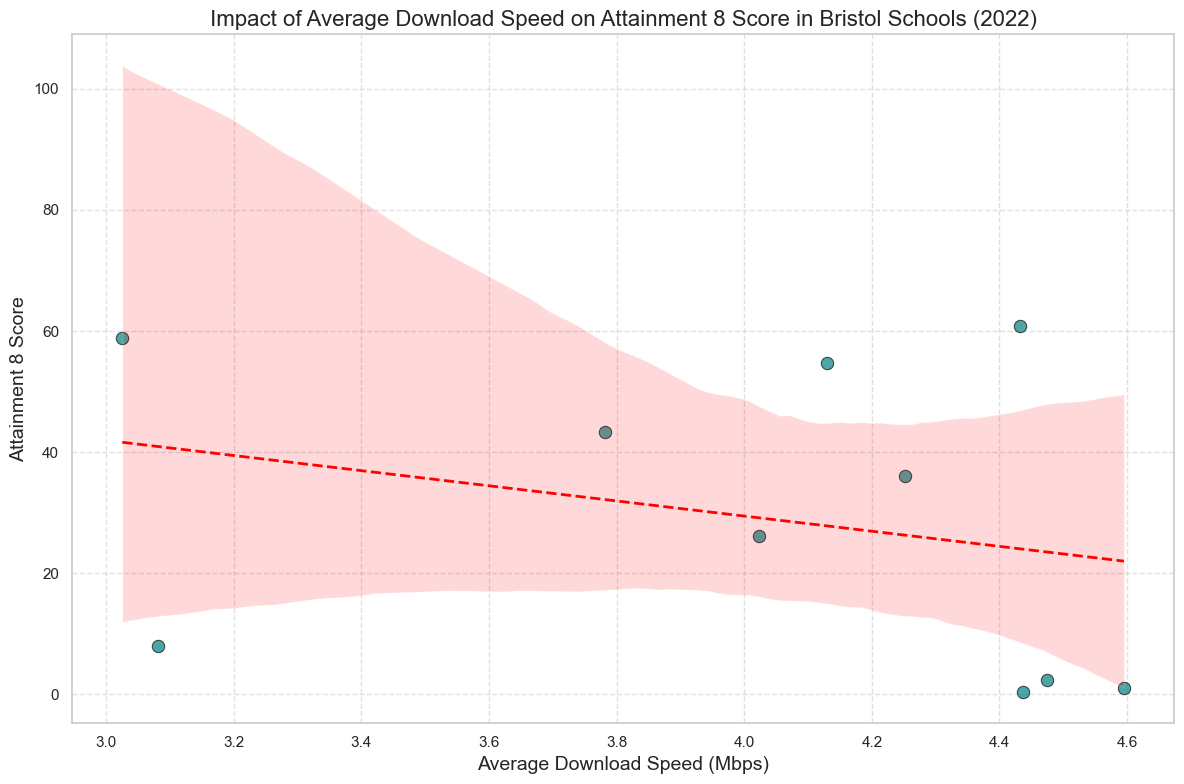

In [17]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.scatterplot(x='Average_download_speed_Mbit_s', y='ATT8SCR', 
                data=bristol_analysis, color='teal', s=80, edgecolor='black', alpha=0.7)
sns.regplot(x='Average_download_speed_Mbit_s', 
            y='ATT8SCR', 
            data=bristol_analysis, 
            scatter=False, color='red', line_kws={"linewidth":2, "linestyle":"--"})
plt.title('Impact of Average Download Speed on Attainment 8 Score in Bristol Schools (2022)', fontsize=16)
plt.xlabel('Average Download Speed (Mbps)', fontsize=14)
plt.ylabel('Attainment 8 Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Same steps are now taken for Cornwall

In [12]:
cornwall_analysis = pd.merge(cornwall_schools_2022, cornwall_broadband, left_on='Postcode', right_on='postcode_space')
cornwall_analysis = cornwall_analysis[['ATT8SCR', 'Average_download_speed_Mbit_s']]

In [13]:
correlation_cornwall = cornwall_analysis.corr().loc['ATT8SCR', 'Average_download_speed_Mbit_s']
print(f'Correlation for Cornwall: {correlation_cornwall}')

Correlation for Cornwall: 0.8584690001996532


In [14]:
X_cornwall = cornwall_analysis[['Average_download_speed_Mbit_s']]
y_cornwall = cornwall_analysis['ATT8SCR']
regressor_cornwall = LinearRegression().fit(X_cornwall, y_cornwall)
y_pred_cornwall = regressor_cornwall.predict(X_cornwall)

cornwall_intercept = regressor_cornwall.intercept_
cornwall_slope = regressor_cornwall.coef_[0]

Model summary is as follows : 

In [15]:
model = sm.OLS(y_cornwall, X_cornwall).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                ATT8SCR   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.861
Method:                 Least Squares   F-statistic:                              44.37
Date:                Mon, 19 Aug 2024   Prob (F-statistic):                    0.000554
Time:                        15:59:30   Log-Likelihood:                         -28.409
No. Observations:                   7   AIC:                                      58.82
Df Residuals:                       6   BIC:                                      58.76
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


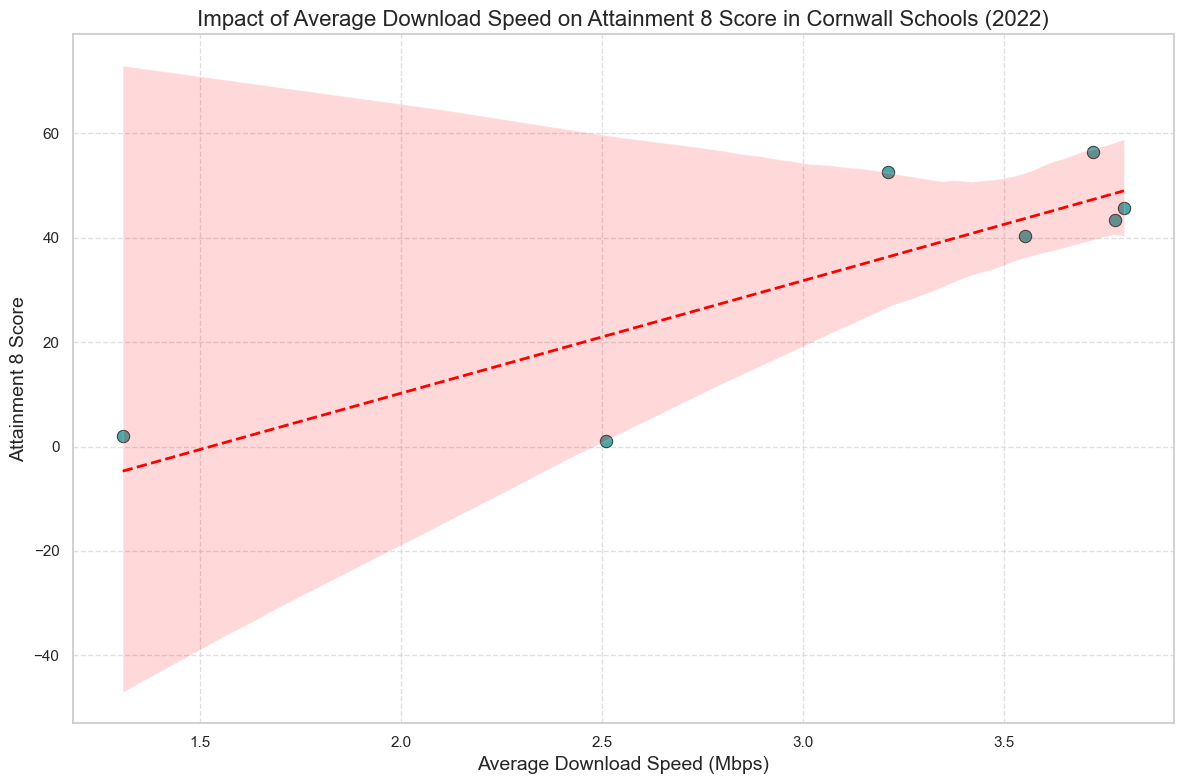

In [16]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

sns.scatterplot(x='Average_download_speed_Mbit_s', y='ATT8SCR', 
                data=cornwall_analysis, color='teal', s=80, edgecolor='black', alpha=0.7)

sns.regplot(x='Average_download_speed_Mbit_s', 
            y='ATT8SCR', 
            data=cornwall_analysis, 
            scatter=False, color='red', line_kws={"linewidth":2, "linestyle":"--"})

plt.title('Impact of Average Download Speed on Attainment 8 Score in Cornwall Schools (2022)', fontsize=16)
plt.xlabel('Average Download Speed (Mbps)', fontsize=14)
plt.ylabel('Attainment 8 Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()